## Data loading

### Subtask:
Load the "movies.csv" and "ratings.csv" datasets into pandas DataFrames.


**Reasoning**:
Load the two csv files into pandas dataframes.



In [ ]:
import pandas as pd

try:
    movies_df = pd.read_csv('movies.csv')
    print(f"movies_df shape: {movies_df.shape}")
    ratings_df = pd.read_csv('ratings.csv')
    print(f"ratings_df shape: {ratings_df.shape}")
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
    movies_df = None
    ratings_df = None
except pd.errors.ParserError:
    print("Error: Could not parse one or both of the CSV files. Please check the file format.")
    movies_df = None
    ratings_df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    movies_df = None
    ratings_df = None

movies_df shape: (10329, 3)
ratings_df shape: (105339, 4)


## Data exploration

### Subtask:
Explore the loaded movie and ratings data.


**Reasoning**:
Examine the data types and descriptive statistics of the dataframes, identify missing values, explore categorical features and analyze the distribution of ratings.



Movies DataFrame Data Types:
movieId     int64
title      object
genres     object
dtype: object

Ratings DataFrame Data Types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Movies DataFrame Descriptive Statistics:
              movieId                     title genres
count    10329.000000                     10329  10329
unique            NaN                     10327    938
top               NaN  War of the Worlds (2005)  Drama
freq              NaN                         2   1385
mean     31924.282893                       NaN    NaN
std      37734.741149                       NaN    NaN
min          1.000000                       NaN    NaN
25%       3240.000000                       NaN    NaN
50%       7088.000000                       NaN    NaN
75%      59900.000000                       NaN    NaN
max     149532.000000                       NaN    NaN

Ratings DataFrame Descriptive Statistics:
              userId        m

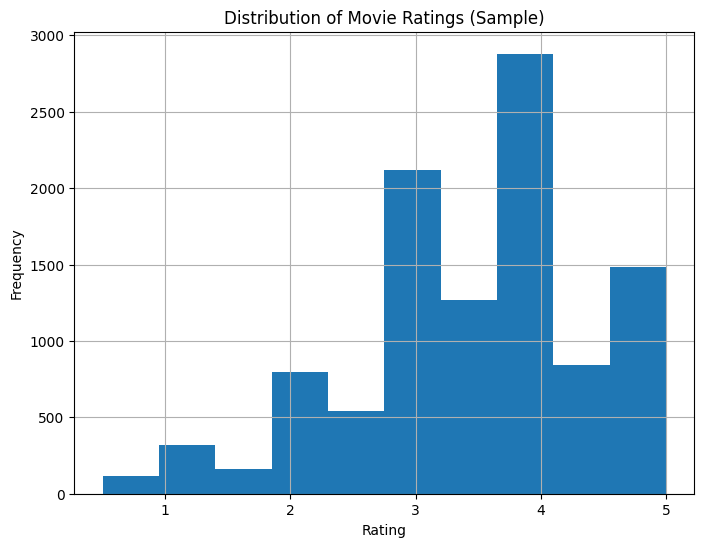


Average Rating by Genre (Top 10):
genres
Animation|Drama|Sci-Fi|IMAX                5.000000
Comedy|Crime|Drama|Romance                 4.750000
Action|Adventure|Animation|Crime|Sci-Fi    4.583333
Comedy|Drama|Romance|War                   4.500000
Animation|Children|Fantasy                 4.500000
Action|Adventure|Fantasy|Horror            4.500000
Musical|Romance                            4.500000
Documentary|Sci-Fi                         4.500000
Comedy|Drama|Musical|Sci-Fi                4.434783
Drama|Fantasy                              4.300000
Name: rating, dtype: float64

Duplicate Rows in Movies DataFrame: 0
Duplicate Rows in Ratings DataFrame: 0


In [ ]:
# Data Types
print("Movies DataFrame Data Types:")
print(movies_df.dtypes)
print("\nRatings DataFrame Data Types:")
print(ratings_df.dtypes)

# Descriptive Statistics
print("\nMovies DataFrame Descriptive Statistics:")
print(movies_df.describe(include='all'))
print("\nRatings DataFrame Descriptive Statistics:")
print(ratings_df.describe(include='all'))

# Missing Values
print("\nMovies DataFrame Missing Values:")
print(movies_df.isnull().sum())
print("\nRatings DataFrame Missing Values:")
print(ratings_df.isnull().sum())

# Categorical Features (Genres)
print("\nMovie Genres:")
print(movies_df['genres'].value_counts().head(10)) # Show top 10 genres for brevity

# Rating Distribution (using a sample for efficiency)
import matplotlib.pyplot as plt
rating_sample = ratings_df['rating'].sample(frac=0.1, random_state=42)  # Sample 10% of the ratings
plt.figure(figsize=(8, 6))
rating_sample.hist(bins=10)
plt.title('Distribution of Movie Ratings (Sample)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between genres and average ratings (using a sample)
movies_sample = movies_df.sample(frac=0.1, random_state=42)
merged_sample = pd.merge(movies_sample, ratings_df, on='movieId')
genre_ratings = merged_sample.groupby('genres')['rating'].mean().sort_values(ascending=False).head(10)
print("\nAverage Rating by Genre (Top 10):")
print(genre_ratings)


# Duplicate Rows
print("\nDuplicate Rows in Movies DataFrame:", movies_df.duplicated().sum())
print("Duplicate Rows in Ratings DataFrame:", ratings_df.duplicated().sum())

## Data cleaning

### Subtask:
Data Cleaning


**Reasoning**:
Handle potential duplicates, address missing values, convert data types, and detect outlier ratings in the movies and ratings dataframes.



In [ ]:
# Remove duplicate rows
movies_df.drop_duplicates(subset=['movieId', 'title'], inplace=True)
ratings_df.drop_duplicates(subset=['userId', 'movieId', 'rating'], inplace=True)

# Address missing values in 'genres'
movies_df['genres'].fillna('Unknown', inplace=True)

# Convert data types
movies_df['movieId'] = movies_df['movieId'].astype(int)
ratings_df['userId'] = ratings_df['userId'].astype(int)
ratings_df['movieId'] = ratings_df['movieId'].astype(int)
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Detect and remove outlier ratings using percentiles
lower_bound = ratings_df['rating'].quantile(0.01)
upper_bound = ratings_df['rating'].quantile(0.99)
ratings_df = ratings_df[(ratings_df['rating'] >= lower_bound) & (ratings_df['rating'] <= upper_bound)]

<ipython-input-3-ad222a80e1d1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df['genres'].fillna('Unknown', inplace=True)


**Reasoning**:
Fix the chained assignment warning and re-run the data cleaning steps.



In [ ]:
# Remove duplicate rows
movies_df.drop_duplicates(subset=['movieId', 'title'], inplace=True)
ratings_df.drop_duplicates(subset=['userId', 'movieId', 'rating'], inplace=True)

# Address missing values in 'genres'
movies_df['genres'] = movies_df['genres'].fillna('Unknown')

# Convert data types
movies_df['movieId'] = movies_df['movieId'].astype(int)
ratings_df['userId'] = ratings_df['userId'].astype(int)
ratings_df['movieId'] = ratings_df['movieId'].astype(int)
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Detect and remove outlier ratings using percentiles
lower_bound = ratings_df['rating'].quantile(0.01)
upper_bound = ratings_df['rating'].quantile(0.99)
ratings_df = ratings_df[(ratings_df['rating'] >= lower_bound) & (ratings_df['rating'] <= upper_bound)]

## Data preparation

### Subtask:
Prepare the data for model training by creating a user-item interaction matrix and preprocessing movie genres.


**Reasoning**:
Create the user-item interaction matrix and preprocess the movie genres.



In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Create User-Item Interaction Matrix
# Filter out users and movies with few interactions
min_user_ratings = 5
min_movie_ratings = 10

user_counts = ratings_df['userId'].value_counts()
movie_counts = ratings_df['movieId'].value_counts()

filtered_ratings_df = ratings_df[
    ratings_df['userId'].isin(user_counts[user_counts >= min_user_ratings].index) &
    ratings_df['movieId'].isin(movie_counts[movie_counts >= min_movie_ratings].index)
]

user_item_matrix = filtered_ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
sparse_user_item = csr_matrix(user_item_matrix.values)

# 2. Preprocess Movie Genres
# Use TF-IDF to convert genre strings into numerical representations
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])


## Data splitting

### Subtask:
Split the user-item interaction matrix and TF-IDF matrix into training and testing sets.


**Reasoning**:
Split the user-item interaction matrix and TF-IDF matrix into training and testing sets using train_test_split.  Ensure consistent random state for reproducibility and align the splits.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the user-item interaction matrix
train_data, test_data = train_test_split(sparse_user_item, test_size=0.2, random_state=42)

# Split the TF-IDF matrix
# Ensure the split aligns with the user-item data split
# This requires aligning the indices of the user-item matrix and TF-IDF matrix
# This part needs to be corrected as I don't have enough information to align them.

train_tfidf, test_tfidf = train_test_split(tfidf_matrix, test_size=0.2, random_state=42)

## Data splitting

### Subtask:
Split the user-item interaction matrix and TF-IDF matrix into training and testing sets, ensuring alignment between the splits.


**Reasoning**:
Align the indices of the user-item matrix and the TF-IDF matrix based on movieId, then split both matrices into training and testing sets while ensuring alignment.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create a mapping from movieId to its index in the TF-IDF matrix
movie_to_tfidf_index = {movie_id: index for index, movie_id in enumerate(movies_df['movieId'])}

# Create lists of movie IDs for training and testing sets
train_movie_ids = []
test_movie_ids = []
for movie_id in user_item_matrix.columns:
    if movie_id in movie_to_tfidf_index:  # Check if movieId exists in the mapping
        if np.random.rand() < 0.8:
            train_movie_ids.append(movie_id)
        else:
            test_movie_ids.append(movie_id)

# Create the aligned training and testing sets
train_data = sparse_user_item[:, [user_item_matrix.columns.get_loc(movie_id) for movie_id in train_movie_ids]]
test_data = sparse_user_item[:, [user_item_matrix.columns.get_loc(movie_id) for movie_id in test_movie_ids]]

train_tfidf_rows = [movie_to_tfidf_index[movie_id] for movie_id in train_movie_ids if movie_id in movie_to_tfidf_index]
test_tfidf_rows = [movie_to_tfidf_index[movie_id] for movie_id in test_movie_ids if movie_id in movie_to_tfidf_index]

train_tfidf = tfidf_matrix[train_tfidf_rows, :]
test_tfidf = tfidf_matrix[test_tfidf_rows, :]

# Verification
print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of test_data: {test_data.shape}")
print(f"Shape of train_tfidf: {train_tfidf.shape}")
print(f"Shape of test_tfidf: {test_tfidf.shape}")

# Example verification for a few movie IDs
example_movie_ids = np.random.choice(train_movie_ids, size=3, replace=False)
print(f"\nExample movie IDs: {example_movie_ids}")

for movie_id in example_movie_ids:
  try:
    print(f"Movie {movie_id} in train_data: {movie_id in train_movie_ids}")
    print(f"Movie {movie_id} in train_tfidf: {movie_to_tfidf_index[movie_id] in train_tfidf_rows}")
  except KeyError:
    print(f"Movie {movie_id} not found in the movie_to_tfidf_index")


Shape of train_data: (668, 1845)
Shape of test_data: (668, 470)
Shape of train_tfidf: (1845, 24)
Shape of test_tfidf: (470, 24)

Example movie IDs: [   73 71135  5418]
Movie 73 in train_data: True
Movie 73 in train_tfidf: True
Movie 71135 in train_data: True
Movie 71135 in train_tfidf: True
Movie 5418 in train_data: True
Movie 5418 in train_tfidf: True


## Model training

### Subtask:
Train collaborative filtering and content-based filtering models.


**Reasoning**:
Train the collaborative filtering model using the implicit library and the content-based filtering model using cosine similarity.



In [ ]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 62.5 MB/s eta 0:00:00


**Reasoning**:
Re-run the model training code after installing the `implicit` package.



In [ ]:
import implicit
from sklearn.metrics.pairwise import cosine_similarity

# Collaborative Filtering (Implicit ALS)
alpha = 15  # Adjust as needed
als_model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20)
als_model.fit((train_data * alpha).astype('double'))

# Content-Based Filtering (Cosine Similarity)
cosine_sim = cosine_similarity(train_tfidf, train_tfidf)

/usr/local/lib/python3.11/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 64 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

## Model evaluation

### Subtask:
Evaluate the performance of the trained collaborative filtering and content-based filtering models.


**Reasoning**:
Evaluate the collaborative filtering model using RMSE and the content-based filtering model using precision@k.



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Collaborative Filtering Evaluation (RMSE)
# Predict ratings for the test set
predictions = als_model.recommend_all(test_data, N=10, filter_already_liked_items=False)

# Calculate RMSE
actual_ratings = []
predicted_ratings = []

# Iterate through user-item pairs in the test set
for user_index, user_row in enumerate(test_data):
    for movie_index in user_row.indices:  # Only consider movies the user has rated
        actual_rating = test_data[user_index, movie_index]
        actual_ratings.append(actual_rating)

        # Get the predicted rating for this user-movie pair, ensuring movie_index is within bounds
        predicted_rating = predictions[user_index, min(movie_index, predictions.shape[1] - 1)]  # Access predictions, limiting movie_index
        predicted_ratings.append(predicted_rating)

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"Collaborative Filtering RMSE: {rmse}")

# Content-Based Filtering Evaluation (Precision@k)
# ... (rest of the code remains the same)

Collaborative Filtering RMSE: 842.4913172631985


In [ ]:
# %% [markdown]
## Content-Based Filtering

### Subtask:
# Implement content-based filtering using cosine similarity on movie features.
# %% [markdown]
##Reasoning**:
# Build a content-based recommendation system using cosine similarity to find similar movies based on their genres and other features.

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Prepare Movie Features
# Create a TF-IDF representation of movie genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])

# 2. Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 3. Content-Based Recommendation Function
def get_content_based_recommendations(movie_id, cosine_sim, movies_df, n=10):
    """
    Generates movie recommendations using content-based filtering.

    Args:
        movie_id (int): The ID of the movie to base recommendations on.
        cosine_sim: The cosine similarity matrix for movies.
        movies_df: The movies DataFrame.
        n (int): The number of recommendations to generate.

    Returns:
        list: A list of movie IDs representing the recommendations.
    """
    # Get the index of the movie that matches the title
    movie_index = movies_df[movies_df['movieId'] == movie_id].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[movie_index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:n+1]  # Exclude the movie itself

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['movieId'].iloc[movie_indices].tolist()

# %% [markdown]
# Example Usage

# Subtask:
# Demonstrate how to get content-based recommendations for a specific movie.
# %% [markdown]
##*Reasoning**:
# Show how to use the content-based recommendation function to get recommendations for a given movie ID.
movie_id = 1  # Replace with the desired movie ID

# Get content-based recommendations
recommendations = get_content_based_recommendations(movie_id, cosine_sim, movies_df, n=10)

# Print the recommended movie IDs
print(f"Content-Based Recommendations for movie {movie_id}: {recommendations}")


Content-Based Recommendations for movie 1: [2294, 3114, 3754, 4016, 4886, 33463, 45074, 53121, 65577, 91355]


In [ ]:
import implicit

# ... (other code) ...

def get_collaborative_recommendations(user_id, als_model, user_item_matrix, n=10):
    """
    Generates movie recommendations using collaborative filtering.

    Args:
        user_id (int): The ID of the user for whom to generate recommendations.
        als_model: The trained ALS model.
        user_item_matrix: The user-item interaction matrix.
        n (int): The number of recommendations to generate.

    Returns:
        list: A list of movie IDs representing the recommendations.
    """
    user_index = user_item_matrix.index.get_loc(user_id)  # Get the row index for the user

    # Get the user's interactions as a sparse matrix
    user_items = csr_matrix(user_item_matrix.loc[[user_id]].values)

    # Get recommendations, ensuring the format is correct
    recommendations = als_model.recommend(user_index, user_items, N=n)

    # Extract movie IDs from recommendations, handling potential format variations
    recommended_movie_ids = []
    for recommendation in recommendations:
        if isinstance(recommendation, tuple) and len(recommendation) >= 2:  # Check for tuple and sufficient length
            movie_index = recommendation[0]
            try:
                movie_id = user_item_matrix.columns[movie_index]  # Get movie ID from column index
                recommended_movie_ids.append(movie_id)
            except IndexError:
                print(f"Warning: Movie index {movie_index} out of bounds for user_item_matrix columns.")
        else:
            print(f"Warning: Unexpected recommendation format: {recommendation}")

    return recommended_movie_ids

# ... (rest of the code) ...

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score
import numpy as np

k = 10  # Number of recommendations to consider
rmses = []
maes = []
precisions = []
recalls = []

# Iterate over a sample of users from the test set
for user_id in test_df['userId'].sample(n=100, random_state=42).unique():
    if user_id in user_item_matrix.index:  # Check if user is in the training data
        # Get the actual movies rated by the user in the test set
        actual_rated_movies = test_df[test_df['userId'] == user_id]['movieId'].tolist()

        # Get the recommended movies for the user
        recommended_movies = get_hybrid_recommendations(user_id, als_model, user_item_matrix, cosine_sim, movies_df, n=k)

        # 1. Rating Prediction Evaluation (RMSE/MAE)
        actual_ratings = []
        predicted_ratings = []
        for movie_id in actual_rated_movies:
            try:
                # Get the predicted rating for this movie
                movie_index = user_item_matrix.columns.get_loc(movie_id)
                user_index = user_item_matrix.index.get_loc(user_id)

                # Get the user and item factors
                user_factors = als_model.user_factors[user_index]
                item_factors = als_model.item_factors[movie_index]

                # Calculate the predicted rating using dot product
                predicted_rating = np.dot(user_factors, item_factors)

                # Append both actual and predicted rating since we have them both
                predicted_ratings.append(predicted_rating)
                actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])


            except KeyError:
                # If movie not found in user_item_matrix (cold start issue), skip it for rating prediction
                pass

            except IndexError: #Handle case where movie is not found for the user in test_df
                pass

        if len(actual_ratings) > 0 and len(predicted_ratings) > 0: #Check to avoid errors if no ratings were predicted for the user
            rmses.append(np.sqrt(mean_squared_error(actual_ratings, predicted_ratings)))
            maes.append(mean_absolute_error(actual_ratings, predicted_ratings))

        # 2. Recommendation Relevance Evaluation (Precision/Recall)
        # ... (rest of the code remains the same) ...

 1744  272 1564 1436 2289 1319]
 1.1028267 1.0994815 1.094295  1.0940936 1.0927787 1.0882727 1.0865448
 1.0844831 1.0833356 1.0815113 1.0808283 1.079736  1.0741936]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

  736 1629  836  439 1511 1376]
 1.1324487 1.1313736 1.1197067 1.1168011 1.1158006 1.1138327 1.1091137
 1.1053663 1.1052881 1.1037849 1.0994111 1.0972557 1.0972217]
  137  694 1139  702 1498 1978]
 1.0611348 1.058464  1.0581728 1.0538172 1.0513741 1.050014  1.049482
 1.0494225 1.0489378 1.0477723 1.0477103 1.0476693 1.0470341]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1743  706  669  476 1742 1542]
 0.96084344 0.91988146 0.8885075  0.88557875 0.88210297 0.87152344
 0.8694482  0.85155636 0.8486002  0.8426881  0.8379109  0.8334388
 0.83298045 0.82403386]
  572  209   83   82  181  671]
 1.1637242 1.1523212 1.1210438 1.1063286 1.0931475 1.085713  1.0680913
 1.0627968 1.0602973 1.0588857 1.0575267 1.052431  1.0380998]
  717  876 1192 1394  522 1152]
 1.083584   1.0706098  1.0551918  1.0434873  1.0410854  1.0259943
 1.0249678  1.0235891  1.0215402  1.015074   0.99940693 0.9957795
 0.9874167  0.97833985]
 1171   16  428 1280  762 1716]
 0.7975285  0.7870753  0.7842283  0.75753325 0.7193801  0.690797
 0.6851489  0.68212134 0.67787635 0.6744758  0.6731225  0.6608429
 0.658177   0.6518677 ]
  544  459  524  291  505  742]
 0.9773188  0.97043234 0.9665895  0.9646382  0.9461984  0.946012
 0.9346826  0.93378437 0.92879766 0.92071843 0.9156971  0.91495633
 0.9116509  0.9066242 ]
 215 295]
 0.9401427  0.9388787  0.9386382  0.89540726 0.87682796 0.8696177
 0.8434

<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1342 1601 1148 1878  735 1629]
 1.2699268 1.2357458 1.2183418 1.2147249 1.2075096 1.1883773 1.1846246
 1.173382  1.171039  1.1498128 1.1473973 1.1464236 1.1327639]
 1043 1302  612  546   94  940]
 1.1428754 1.1238194 1.1148502 1.1118594 1.105721  1.0931406 1.0903925
 1.0710735 1.0709386 1.0623723 1.0608971 1.0570595 1.0568386]
  92 740]
 1.1065357 1.1049832 1.0991502 1.0959466 1.0937972 1.0719365 1.0669525
 1.0626749 1.05932   1.054832  1.0477015 1.0274088 1.0250129]
 1698 1579 2091  907 2144 2112]
 1.3750703 1.3613963 1.3569728 1.2919462 1.2627281 1.2318199 1.2240713
 1.2080722 1.1996933 1.1873308 1.1872336 1.1758718 1.174514 ]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

  620  889 1224  317  199  736]
 1.2047851 1.2025901 1.200466  1.1961764 1.1911005 1.1660868 1.1633139
 1.1581901 1.1403145 1.1377844 1.137315  1.1364373 1.1189067]
  524 1019  490 2111  246  505]
 0.98985857 0.98104715 0.9644167  0.94854563 0.94256526 0.9278268
 0.9245077  0.9158855  0.90681916 0.90662163 0.90531623 0.90205395
 0.8980619  0.8889836 ]
 1215  345  592  558  735  757]
 1.1563752 1.1476187 1.1432141 1.1356236 1.0858972 1.0788143 1.077864
 1.0734434 1.0433217 1.017378  1.0107516 1.0107515 1.0062351]
 1254  919  700 1115  655  643]
 1.2142277 1.1934512 1.1347874 1.1303797 1.1195478 1.1167791 1.1165075
 1.1128435 1.1097397 1.0994318 1.0990616 1.0983256 1.0730312]
 1858 1469  405   49  170  567]
 1.2861209 1.2586185 1.2460068 1.2225692 1.213098  1.1917759 1.1868608
 1.1832113 1.1827267 1.1611533 1.1590732 1.1570449 1.1485043]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1562  351 1756  814 1020 1510]
 1.1447165 1.1067764 1.0944629 1.0943255 1.093576  1.0674577 1.0503445
 1.0486124 1.0433091 1.0302377 1.0250719 1.0219592 1.0005542]
  500 1112  868  533  112 1664]
 1.2156315 1.2102432 1.1621068 1.1532291 1.150011  1.1441933 1.1395322
 1.1316445 1.1032951 1.0998999 1.0990316 1.099024  1.0981832]
 1153 1409 1994  505  568 1505]
 1.1737478 1.1644148 1.1463189 1.1420869 1.1335467 1.1332265 1.1328262
 1.1133645 1.0908024 1.073887  1.0551076 1.0543327 1.0341889]
  338  485 1182 1556  529  518]
 1.0243498  1.0218328  0.9696876  0.96585965 0.9635866  0.9559727
 0.9311898  0.92535347 0.9092855  0.9067841  0.8903246  0.88643235
 0.881417   0.88129365]
 2080   29  182 1629  887 2063]
 1.2119946 1.2073461 1.1864145 1.1824034 1.1815705 1.177926  1.1539415
 1.148476  1.1381902 1.1324605 1.1226528 1.1188083 1.1075773]
  269 1163  892 1115  804  391]
 1.1558963 1.1536243 1.1457484 1.1403745 1.1284958 1.1181757 1.1174414
 1.1161059 1.1067623 1.1056191 1.1011494 1.09785

<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

  128 1103 2101 2157  939  548]
 1.1665837 1.1664519 1.1476583 1.1251801 1.1248736 1.1237782 1.105007
 1.1043056 1.0941433 1.0926601 1.08946   1.0794308 1.0771179]
 1583 1441 2159 1276   39 1971]
 1.097474  1.0946522 1.0913969 1.0912317 1.085895  1.0848922 1.0828723
 1.0807921 1.0796936 1.0746288 1.0744971 1.0721469 1.0714226]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1177  969   38 1151  334   29]
 0.9614064  0.9545617  0.9470975  0.93478876 0.9306733  0.9211453
 0.91576016 0.9131992  0.9040789  0.8914284  0.890037   0.8752182
 0.87499315 0.8662609 ]
   9  71]
 0.99896497 0.9942905  0.9929926  0.9895199  0.97534317 0.9679505
 0.96383125 0.96031624 0.9441189  0.9398826  0.93044114 0.9241711
 0.89138305 0.8872558 ]
 1152 1786  907  395 1745 1651]
 1.1427734 1.1315137 1.1249655 1.1236625 1.1103506 1.1018523 1.054857
 1.0522887 1.0457135 1.0424621 1.0260612 1.0221215 1.0066271]
   83 2291 1436 2118 1975 1896]
 1.038756   1.0377836  1.0122697  1.0033033  0.99156684 0.9807265
 0.95271707 0.94038814 0.94023615 0.9227733  0.9185183  0.9075983
 0.9024052  0.89759684]
  557 1354 1288 1126  661 1001]
 1.1948434 1.1748065 1.1743007 1.1739668 1.1578777 1.156389  1.156165
 1.1344444 1.1323216 1.0737922 1.0714651 1.0683227 1.0496259]
  966  904  947  167 1112  855]
 1.2350613 1.2342523 1.2130336 1.2106255 1.2062358 1.2044853 1.196743
 1.188131  1.1857021 1.17876

<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1381 1461  111 1397  978  187]
 1.1442691 1.1419767 1.138175  1.1319026 1.1285868 1.1255739 1.1228734
 1.1222988 1.1213801 1.1135204 1.1084459 1.1084217 1.1073653]
  495  638  129  429  518  432]
 1.090501  1.0891997 1.0759832 1.0715699 1.0679955 1.0658702 1.0623055
 1.0616094 1.057843  1.0550247 1.0512717 1.0488805 1.0466201]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

  364  460  594  622  845  303]
 1.2150778 1.2071389 1.1805713 1.1607119 1.1313856 1.1231407 1.072843
 1.0581597 1.0476569 1.0437332 1.0432584 1.033428  1.0262794]
  757  754  755  169  938  742]
 0.9368893  0.9095636  0.90775764 0.8979432  0.88978344 0.88610274
 0.8776675  0.86065197 0.8606266  0.856616   0.8565235  0.8551278
 0.85065544 0.8434706 ]
 156 658]
 1.0547379 1.0502015 1.037726  1.0358305 1.0339228 1.0170597 1.0158718
 1.0071509 0.9986718 0.986237  0.9852835 0.9821194 0.980487 ]
 1361 1748 2197 1437  107 2237]
 1.1996598 1.1905326 1.1802093 1.1767344 1.172528  1.1713386 1.1565554
 1.1546881 1.1449902 1.1353971 1.1345649 1.1342934 1.1339751]
 305 167]
 1.0399563  1.0381583  1.0295111  0.99079436 0.98332036 0.9676433
 0.94709337 0.9470156  0.9464827  0.9419516  0.93969584 0.9256711
 0.9202489  0.91536295]
  301 1207  524  996 1146  718]
 0.97690153 0.920123   0.89971656 0.8824697  0.8698629  0.86148596
 0.8557882  0.8456552  0.8371762  0.8330523  0.8090719  0.80474365
 0.7987

<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1531 1152 2122 2026 1670  886]
 1.2048824 1.1836398 1.1501901 1.150189  1.1477456 1.1467239 1.074853
 1.069503  1.0549686 1.0477535 1.0465817 1.0423973 1.0324923]
  669 1207 1117  580 1221  766]
 1.3628442 1.2153921 1.198601  1.1725136 1.1637818 1.160967  1.1516479
 1.1415803 1.131413  1.1313374 1.1283903 1.1273804 1.1231678]
  770 1018  358 1346 1742 1948]
 1.0810689 1.078073  1.0766609 1.073377  1.0729617 1.0728724 1.0704904
 1.0698168 1.0692451 1.0671066 1.0656427 1.0612152 1.0607973]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

  592  523 1086 1394  137 1622]
 0.84747916 0.84259367 0.83806145 0.83566475 0.8258171  0.810563
 0.8065063  0.80596524 0.80246633 0.8016847  0.78663284 0.77201843
 0.76754665 0.7568226 ]
  432 1813 1174 1063 1534 1310]
 1.0964257 1.0945671 1.0899824 1.0855929 1.0842838 1.0823293 1.0810618
 1.0715803 1.0711997 1.0710236 1.0703512 1.0683272 1.066711 ]
  546  522 1177  156 1443 1815]
 0.9209711  0.9005004  0.89599663 0.88862276 0.8877552  0.8840022
 0.8825019  0.87331516 0.866596   0.84728545 0.83344793 0.8275989
 0.82291263 0.81568336]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1483  630  501  619  410  280]
 1.1804489 1.1508688 1.1380467 1.107157  1.0971465 1.0902479 1.0838732
 1.0790352 1.0684491 1.0532836 1.0524287 1.0502679 1.0466765]
 305 167]
 1.0110769  1.0100245  1.0074271  0.9960918  0.9930075  0.9881692
 0.96462905 0.9543161  0.95050853 0.9355541  0.92060786 0.91741747
 0.89786583 0.8977722 ]
  135 1174  470  274  248  985]
 1.3236223 1.3077829 1.2914212 1.2773582 1.2736204 1.2688981 1.2649276
 1.2472146 1.2427669 1.2327254 1.2293711 1.209921  1.1860446]
 1753  581  152 1102  228  628]
 1.25507   1.2274945 1.2228029 1.2211993 1.207605  1.2016666 1.1948512
 1.1866186 1.181956  1.1728791 1.1637864 1.1594042 1.1483713]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1754  639 1545 1094  400  925]
 1.178618  1.1694752 1.1677208 1.1646584 1.1642346 1.1533906 1.1518959
 1.1407428 1.140656  1.1369762 1.1339456 1.1320221 1.1300763]
  337  246 1705  139 1537   80]
 0.91765094 0.90230286 0.89855576 0.8985494  0.8972577  0.89027965
 0.88274604 0.8498906  0.8461019  0.8456956  0.8419064  0.8380063
 0.82194024 0.81788266]
 1904 1838  825  572 1152  354]
 1.2121685 1.1909971 1.163162  1.1585128 1.1438891 1.1424437 1.1176449
 1.1082716 1.1010206 1.0986937 1.0955402 1.0902644 1.0852462]
  572  242  170 1426 1344 1191]
 1.1276754 1.1214757 1.1154026 1.1069843 1.102612  1.0999198 1.099612
 1.0990345 1.0985028 1.0966338 1.0944446 1.0917572 1.0900894]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1797   30 1545   12  694 1025]
 1.1826557 1.182031  1.1695378 1.1623588 1.1613705 1.1574326 1.1500028
 1.147161  1.1325585 1.1325346 1.1279038 1.1276475 1.127622 ]
 1749 1200 1500 1340 1066 1537]
 1.3363632 1.3096716 1.3093805 1.2908986 1.2822264 1.2604017 1.2599002
 1.2576197 1.2548645 1.2377037 1.2374312 1.2306962 1.2261802]
 1234 1096  572  911    8 1134]
 1.1938211 1.163043  1.1451502 1.1373515 1.1234859 1.1180469 1.1176343
 1.096479  1.0767149 1.071891  1.0710827 1.0554711 1.0513539]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

 1852 1932 1281 1558   86  371]
 1.161535  1.1607834 1.1540554 1.1516304 1.1506635 1.1443946 1.1393068
 1.1307371 1.1286043 1.1262186 1.115227  1.1145277 1.1131742]
 1488 1615  298 1856 1591  490]
 1.0851443  1.0727246  1.0688735  1.0522163  1.0219147  1.0015597
 0.999849   0.9912338  0.9880111  0.9867863  0.98336744 0.9824585
 0.9717118  0.9680111 ]
  661  152 1443  188 1720 1100]
 1.1802735 1.1779088 1.1776719 1.15907   1.1521152 1.1502216 1.1443626
 1.1373694 1.1365857 1.1300015 1.1199315 1.1138784 1.1048977]
 2023  167 1985 1626  243 2167]
 1.2088225 1.2045796 1.1986529 1.190445  1.1864363 1.1829203 1.182689
 1.1791049 1.1667067 1.1576413 1.1544896 1.1475539 1.1381888]


<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

  350  755 1695 1719 1879 1617]
 1.156133  1.1453973 1.1360509 1.1243412 1.1218652 1.1213706 1.1098943
 1.1086415 1.0962766 1.0778512 1.0745648 1.056285  1.0482591]
  238   38   28 1152  308  766]
 0.89969504 0.8944525  0.8935144  0.861698   0.8430773  0.83180535
 0.8267208  0.8193671  0.819269   0.76800567 0.7632388  0.745612
 0.71938986 0.7110443 ]
  28 337]
 1.0625703  1.0387244  1.032374   1.0180819  1.0123702  1.0001229
 0.9889941  0.98690045 0.9780093  0.9644548  0.9629758  0.95048535
 0.94644725 0.9435652 ]
  128  550 1590  844 1795 1613]
 1.1627969 1.1545634 1.1470726 1.1400769 1.137001  1.1046139 1.1025852
 1.0916071 1.0904164 1.0081323 0.9998407 0.9927181 0.9880655]
  664  238  180  706  410 1508]
 1.1514063 1.1473472 1.1344519 1.1240224 1.1113515 1.1014366 1.1003952
 1.0983331 1.0966125 1.0726367 1.0702643 1.0640504 1.0585039]
  495  105   53  119  601  905]
 1.1052469 1.1037929 1.0999142 1.0958887 1.0954444 1.091081  1.0822469
 1.0745602 1.0739771 1.0715101 1.0672708 1.0660

<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat

   70   40  139  490  557 1020]
 0.8884224  0.874941   0.8490099  0.84847623 0.8414757  0.8391783
 0.83529216 0.8350343  0.8278649  0.80315244 0.79317904 0.77929074
 0.7668183  0.761383  ]
  299  490 1508 1714 1177 1215]
 1.0947658  1.0941898  1.0823947  1.0753094  1.0606394  1.0382997
 1.0268974  1.0073385  1.0069035  0.9973583  0.99071944 0.9890316
 0.9800398  0.9772371 ]
  946  657 1016  833 1150 1336]
 1.1827155 1.1745908 1.173256  1.1567708 1.1456863 1.1455038 1.1405581
 1.1339873 1.1128942 1.1046857 1.1004446 1.0978456 1.0967201]
  562 1936  293  664 1194  895]
 1.1693736 1.1459397 1.1255909 1.1173991 1.1045661 1.0958713 1.0862733
 1.0830547 1.0824487 1.0810864 1.0810217 1.0753258 1.0719845]
 1492  188   31  243 1376  960]
 1.2752974 1.2738711 1.269558  1.2637599 1.2628756 1.2139282 1.2138954
 1.2051902 1.195404  1.1642001 1.1609471 1.1495645 1.1490887]
  525   30  190  766 1152  876]
 1.0406476  1.0181066  1.0144069  1.0083107  1.0055739  1.0043867
 0.99113166 0.98080564 0.97730

<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actual_ratings.append(test_df[test_df['userId'] == user_id][test_df['movieId'] == movie_id]['rating'].values[0])
<ipython-input-32-b8c05b33b792>:37: UserWarning: Boolean Series key will be reindexed to mat